In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML,display
%matplotlib inline

In [6]:
filename = 'results/mnist'

In [7]:
# load all performance results into a pandas dataframe
with open(filename,'r') as f:
    all_results = map(json.loads,f.readlines())
#results = pd.DataFrame(results)

In [432]:
def html_conf(conf,bolded=set([])):
    s = '<ul>'
    for k,v in sorted(conf.items()):
        if type(v)==dict:
            s += '<li>%s<ul>'%k
            for k2,v2 in sorted(v.items()):
                if k2 in bolded:
                    k2 = '<b>%s</b>'%k2
                s+='<li>%s: %s</li>'%(k2,str(v2))
            s += '</ul></li>'
        else:
            s+='<li>%s: %s</li>'%(k,v)
    s += '</ul>'
    return s

In [ ]:
#bagging/re-sampling over examples so far.  compare to just one pass?

In [410]:
xs.keys()

[u'random-top',
 u'random-random',
 u'random-empty',
 u'adaptive-random',
 u'adaptive-top',
 u'uncertain-top']

In [436]:
plt.scatter(xs2[7],ys2[7],color='red',
            label='adaptive + semisupervised',marker='>',s=[15]*len(ys))
plt.scatter(xs2[5],ys2[5],color='green',
            label='uncertain',marker='x',s=[15]*len(ys))
plt.scatter(xs2[2],ys2[2],color='black',
            label='random top',marker='.',s=[10]*len(ys))
plt.scatter(xs2[3],ys2[3],color='blue',
            label='random empty',marker='.',s=[10]*len(ys))
plt.scatter(xs2[4],ys2[4],color='orange',
            label='random random',marker='.',s=[10]*len(ys))

#plt.plot(xs[0],pd.rolling_mean(ys[0],20),color='blue',label='uncertainty + semisupervised')
plt.xlim([0,200])
plt.ylim([0.0,1.0])
plt.xlabel('labels requested')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.02, 0.45))
plt.show()

IndexError: list index out of range

In [416]:
xs.keys()

[u'random-top',
 u'random-random',
 u'random-empty',
 u'adaptive-random',
 u'adaptive-top',
 u'uncertain-top']

adaptive-top > red
uncertain-top < green
adaptive-random + black
random-empty x blue
random-top . orange
random-random o purple


/Users/melkherj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()


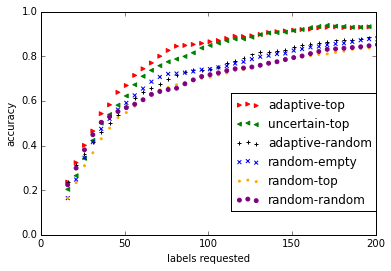

In [437]:
ds = 5 #downsample
#xs2 = [x[::ds] for x in xs]
#ys2 = [pd.rolling_mean(y,15)[::ds] for y in ys]
for name,marker,color in zip(['adaptive-top','uncertain-top','adaptive-random',
                              'random-empty','random-top','random-random'],['>','<','+','x','.','o'],
                             ['red','green','black','blue','orange','purple']):
    x = xs[name][::ds]
    y = pd.rolling_mean(ys[name],15)[::ds]
    print name,marker,color
    plt.scatter(x,y,color=color,label=name,marker=marker,s=[15]*len(ys))
plt.xlim([0,200])
plt.ylim([0.0,1.0])
plt.xlabel('labels requested')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.02, 0.66))
plt.show()

In [385]:
import utils
utils.add_noise(0.5,1.5*math.exp(-0.05*20))

0.5325935144661026

In [9]:
results = pd.DataFrame(all_results[-9]['epoch_stats'])

/Users/melkherj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  if __name__ == '__main__':


(0.0, 1.0)

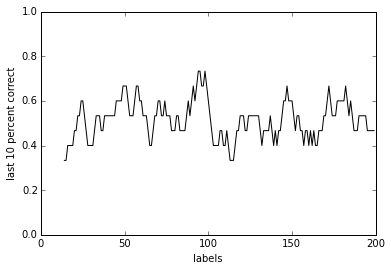

In [13]:
plt.plot(range(200),pd.rolling_mean(results[results['n_next_labeled']>0]['n_labeled_correct'],15),color='black')
plt.xlabel('labels')
plt.ylabel('last 10 percent correct')
plt.ylim([0.,1.0])
#plt.ylabel('active score threshold')

/Users/melkherj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  if __name__ == '__main__':


(0.0, 1.0)

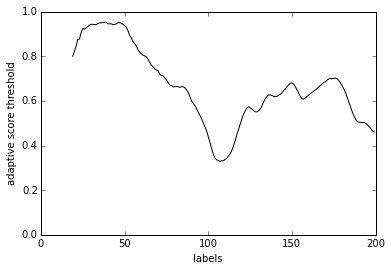

In [458]:
plt.plot(range(200),pd.rolling_mean(results[results['labeled_score']>0]['labeled_score'],20),color='black')
plt.xlabel('labels')
plt.ylabel('adaptive score threshold')
plt.ylim([0.,1.0])
#plt.ylabel('active score threshold')

208
random-top


/Users/melkherj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()


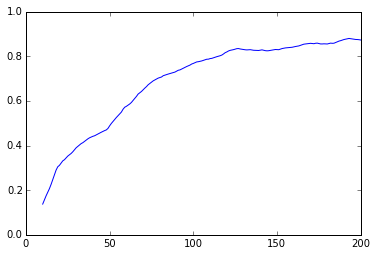

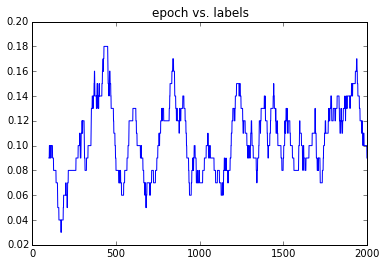

212
adaptive-random


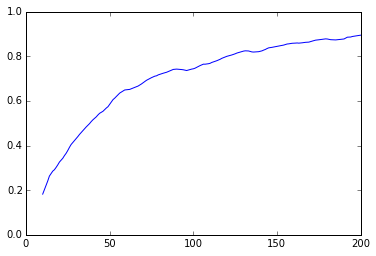

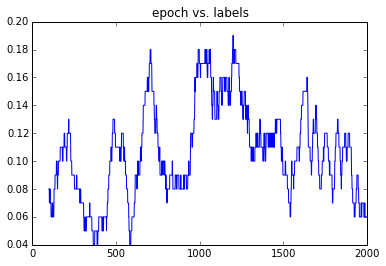

216
adaptive-top


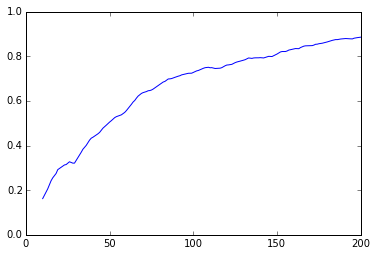

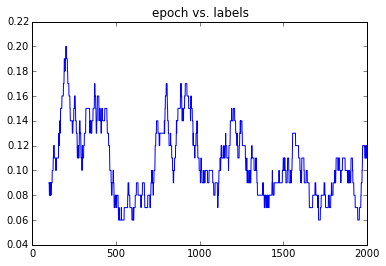

216
uncertain-top


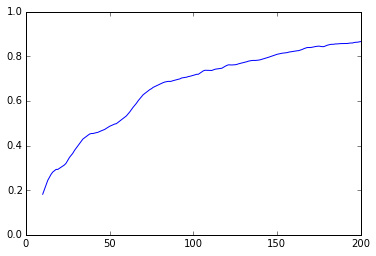

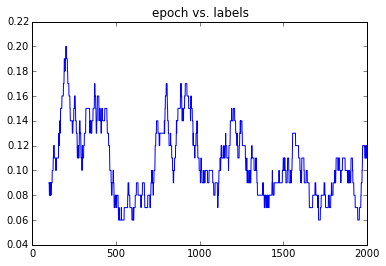

202
random-top


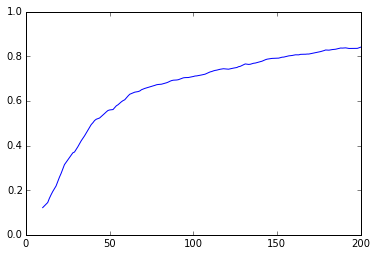

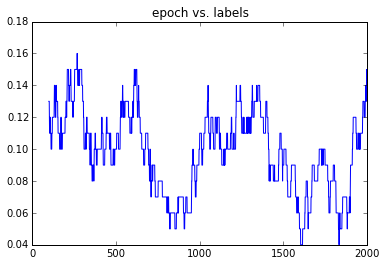

202
random-empty


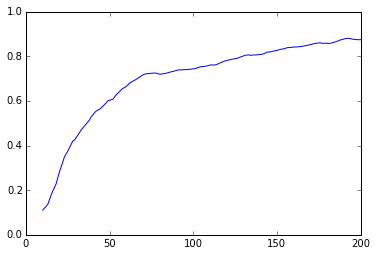

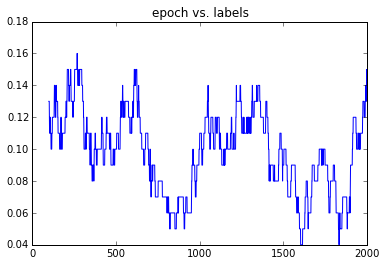

206
random-random


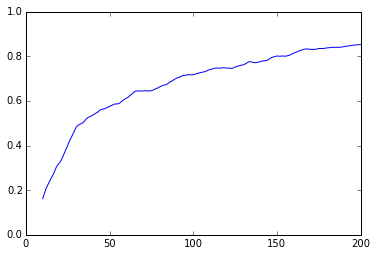

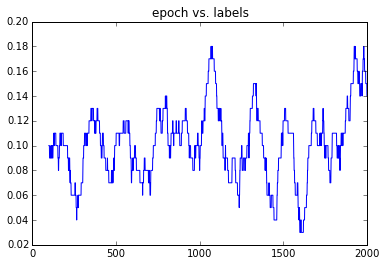

200
uncertain-top


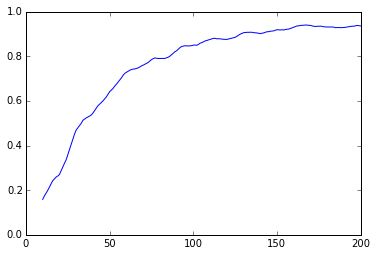

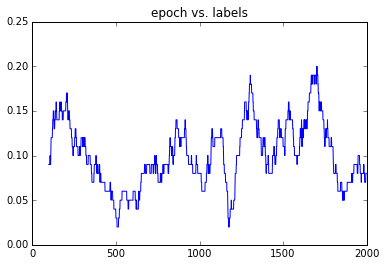

200
adaptive-top


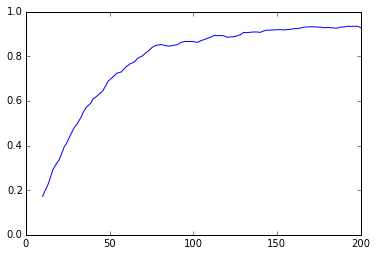

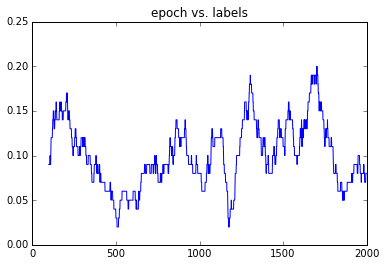

In [434]:
i = 1
xs = {}
ys = {}
for i in range(1,10):
    results = all_results[-i]['epoch_stats']
    conf = all_results[-i].copy()
    del conf['epoch_stats']
    results = pd.DataFrame(results)
    print sum(results['n_next_labeled']>0)
    name='%s-%s'%(conf['active_selector']['name'],conf['semisup_selector']['name'])
    print name
    lab = results[results['n_next_labeled']>0]
    right_cutoff = 70
    xs[name] = lab['n_labeled']
    ys[name] = lab['accuracy']
    plt.plot(lab['n_labeled'],pd.rolling_mean(lab['accuracy'],10)) #[:right_cutoff])
    plt.xlim([0,200])
    plt.ylim([0.0,1.0])
    plt.show()
    display(HTML(html_conf(conf,bolded=set(['name']))))


    plt.plot(range(len(results)),(results['n_next_labeled']>0).rolling(window=100).mean())
    plt.title('epoch vs. labels')
    plt.show()

/Users/melkherj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  if __name__ == '__main__':


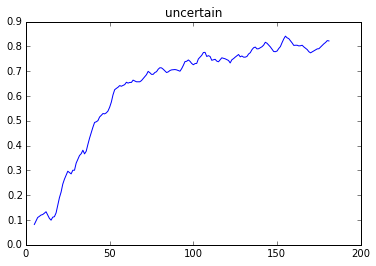

In [190]:
plt.plot(lab['n_labeled'],pd.rolling_mean(lab['accuracy'],5))
plt.title('uncertain')

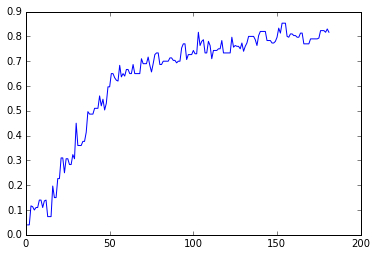

In [171]:
plt.plot(lab['n_labeled'],pd.rolling_mean(lab['accuracy'],5))

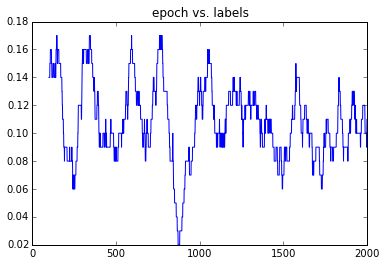

In [56]:
def sts(results,n_labeled=100):
    stats = pd.DataFrame(results['epoch_stats'])
    a = stats[(stats['n_labeled']>=n_labeled-10)&(stats['n_labeled']<=n_labeled+10)]['accuracy'].mean()
    return float(a)

In [88]:
acc(results)

0.6023774497649249

In [101]:
results.keys()

[u'minibatch_semisup',
 u'accuracy_gamma',
 u'random_seed',
 u'n_rescore',
 u'githash',
 u'minibatch_labeled',
 u'batch_size',
 u'selector',
 u'active_label_prob',
 u'train_size',
 u'epochs',
 u'n_accuracy',
 u'test_size',
 u'accuracy_epochs',
 u'epoch_stats',
 u'initial_random_training']

In [114]:
pd.DataFrame([(results['initial_random_training'],acc(results,n_labeled=90)) for results in all_results[-10:]],
            columns=['n_rescore','accuracy']).sort('n_rescore')

/Users/melkherj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from IPython.kernel.zmq import kernelapp as app


,n_rescore,accuracy
2,5,0.630000
3,5,0.747554
5,5,0.745481
8,5,0.683723
0,9,0.723098
4,12,0.644776
9,17,NaN
6,28,0.585981
1,30,0.467692
7,32,0.614308


In [136]:
all_results[-1]['epoch_stats'][0]

{u'accuracy': 0.11666666716337204,
 u'epoch': 0,
 u'exp_accuracy': 0.002333333343267441,
 u'labeled_score': None,
 u'n_labeled': 0,
 u'n_labeled_correct': None,
 u'n_next_labeled': 0,
 u'n_semisup': 30477,
 u'scorediff': 3.649894969592893e-11,
 u'seconds': 0.7030050754547119}

In [165]:
results = pd.DataFrame(all_results[-i]['epoch_stats'])

In [172]:
results

,accuracy,epoch,exp_accuracy,labeled_score,n_labeled,n_labeled_correct,n_next_labeled,n_semisup,scorediff,seconds
0,0.110000,0,0.002200,NaN,0,NaN,0,24882,3.649895e-11,0.666064
1,0.110000,1,0.004356,NaN,0,NaN,0,24882,6.338592e-02,0.275183
2,0.110000,2,0.006469,NaN,0,NaN,0,24827,5.342827e-02,0.246560
3,0.110000,3,0.008540,NaN,0,NaN,0,24782,1.990708e-02,0.246323
4,0.110000,4,0.010569,NaN,0,NaN,0,24767,1.262310e-02,0.249844
5,0.110000,5,0.012557,NaN,0,NaN,0,24776,2.223126e-02,0.242680
6,0.110000,6,0.014506,NaN,0,NaN,0,24792,2.598463e-02,0.241403
7,0.110000,7,0.016416,NaN,0,NaN,0,24793,3.080170e-02,0.247377
8,0.110000,8,0.018288,NaN,0,NaN,0,24805,2.206426e-02,0.241796
9,0.110000,9,0.020122,NaN,0,NaN,0,24816,1.693793e-02,0.244318


In [170]:
c = results['n_labeled']
c.is

In [178]:
pd.rolling_mean(df['n_labeled_correct'],10)

/Users/melkherj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  if __name__ == '__main__':


24      NaN
28      NaN
29      NaN
34      NaN
46      NaN
58      NaN
71      NaN
80      NaN
98      NaN
106     0.0
128     0.0
132     0.0
140     0.0
152     0.0
160     0.0
162     0.0
190     0.1
193     0.1
216     0.1
217     0.2
234     0.2
241     0.2
251     0.2
258     0.2
262     0.2
269     0.2
272     0.1
277     0.1
281     0.1
308     0.0
       ... 
1691    0.4
1703    0.4
1706    0.5
1707    0.6
1710    0.6
1730    0.6
1735    0.6
1745    0.6
1747    0.7
1760    0.6
1766    0.7
1786    0.6
1794    0.6
1803    0.5
1823    0.5
1843    0.4
1850    0.4
1851    0.5
1879    0.4
1883    0.5
1896    0.4
1904    0.4
1917    0.3
1924    0.3
1939    0.3
1960    0.3
1977    0.2
1990    0.1
1992    0.2
1997    0.2
Name: n_labeled_correct, dtype: float64

In [189]:
df['labeled_score']

24      0.316470
28      0.439259
29      0.418727
34      0.556392
46      0.316470
58      0.316470
71      0.310890
80      0.564663
98      0.327709
106     0.362058
128     0.618516
132     0.245179
140     0.316470
152     0.342272
160     0.407331
162     0.481297
190     0.433380
193     0.430298
216     0.547198
217     0.565018
234     0.524199
241     0.348871
251     0.677471
258     0.412978
262     0.255301
269     0.395476
272     0.412522
277     0.190913
281     0.296694
308     0.441468
          ...   
1691    0.344536
1703    0.313440
1706    0.601849
1707    0.596348
1710    0.292381
1730    0.410322
1735    0.437859
1745    0.611461
1747    0.554391
1760    0.621177
1766    0.384260
1786    0.467250
1794    0.662312
1803    0.369595
1823    0.263148
1843    0.490753
1850    0.386663
1851    0.320199
1879    0.571500
1883    0.470465
1896    0.190913
1904    0.283979
1917    0.536835
1924    0.437009
1939    0.514887
1960    0.370207
1977    0.624413
1990    0.5700

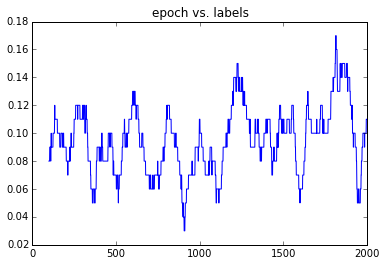

In [95]:
plt.plot(range(len(results)),(results['n_next_labeled']>0).rolling(window=100).mean())
plt.title('epoch vs. labels')
plt.show()

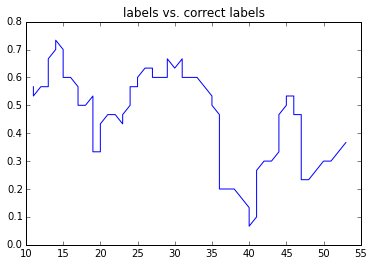

In [93]:
df = results[results['n_next_labeled']>0]
plt.plot(df['n_labeled'],df['n_labeled_correct'].rolling(window=30).mean())
plt.title('labels vs. correct labels')
plt.show()

In [207]:
pd.rolling_mean(results['n_labeled_correct']==0,30)

/Users/melkherj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  if __name__ == '__main__':


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29      0.100000
          ...   
1970    0.033333
1971    0.033333
1972    0.033333
1973    0.033333
1974    0.033333
1975    0.033333
1976    0.033333
1977    0.066667
1978    0.066667
1979    0.066667
1980    0.066667
1981    0.066667
1982    0.066667
1983    0.066667
1984    0.066667
1985    0.066667
1986    0.066667
1987    0.066667
1988    0.066667
1989    0.066667
1990    0.066667
1991    0.066667
1992    0.066667
1993    0.066667
1994    0.066667
1995    0.066667
1996    0.066667
1997    0.0666

In [256]:
import random
import scipy

In [259]:
labeled2.fillna(0)

200     0.000000
201     0.000000
202     0.000000
203     0.000000
204     0.000000
205     0.000000
206     0.000000
207     0.000000
208     0.000000
209     0.000000
210     0.000000
211     0.000000
212     0.000000
213     0.000000
214     0.000000
215     0.000000
216     0.000000
217     0.000000
218     0.000000
219     0.000000
220     0.000000
221     0.000000
222     0.000000
223     0.000000
224     0.000000
225     0.000000
226     0.000000
227     0.000000
228     0.000000
229     0.000000
          ...   
1970    0.001264
1971    0.001264
1972    0.001264
1973    0.001264
1974   -0.023736
1975   -0.023736
1976   -0.023736
1977   -0.023736
1978   -0.023736
1979   -0.023736
1980   -0.023736
1981   -0.023736
1982   -0.023736
1983   -0.023736
1984   -0.023736
1985   -0.023736
1986   -0.023736
1987   -0.048736
1988   -0.048736
1989   -0.048736
1990   -0.023736
1991   -0.023736
1992   -0.023736
1993   -0.023736
1994   -0.048736
1995   -0.048736
1996   -0.048736
1997   -0.0487

In [276]:
acc_deriv[40:][ixs]

89           NaN
1631    0.010667
906     0.023500
532     0.028667
297    -0.028333
244     0.064167
1253    0.043833
908     0.019500
783     0.023500
521     0.033667
74           NaN
1122    0.013833
639     0.000833
555    -0.007333
432     0.003167
1004   -0.024583
1320   -0.024583
921     0.001333
204          NaN
378     0.023833
624    -0.007917
30           NaN
1025    0.005833
86           NaN
1101    0.023000
1543   -0.023167
1244    0.032917
214          NaN
1715   -0.008833
362    -0.015083
          ...   
1699    0.012500
1056    0.019250
1588    0.028000
1035    0.022167
850    -0.015750
274     0.005833
1080   -0.013083
283    -0.019500
804     0.021667
125          NaN
1215   -0.012167
1024    0.005000
1451   -0.002333
1730    0.006083
696     0.033000
852    -0.003917
245     0.063167
1667    0.000333
1116    0.015583
416     0.029167
575     0.012167
512     0.038667
176          NaN
113          NaN
1357    0.019833
1593    0.033667
1729    0.007500
662     0.0161

In [280]:
len(labeled2[40:].dropna())

1760

In [281]:
acc_deriv[40:][ixs]

89           NaN
1631    0.010667
906     0.023500
532     0.028667
297    -0.028333
244     0.064167
1253    0.043833
908     0.019500
783     0.023500
521     0.033667
74           NaN
1122    0.013833
639     0.000833
555    -0.007333
432     0.003167
1004   -0.024583
1320   -0.024583
921     0.001333
204          NaN
378     0.023833
624    -0.007917
30           NaN
1025    0.005833
86           NaN
1101    0.023000
1543   -0.023167
1244    0.032917
214          NaN
1715   -0.008833
362    -0.015083
          ...   
1699    0.012500
1056    0.019250
1588    0.028000
1035    0.022167
850    -0.015750
274     0.005833
1080   -0.013083
283    -0.019500
804     0.021667
125          NaN
1215   -0.012167
1024    0.005000
1451   -0.002333
1730    0.006083
696     0.033000
852    -0.003917
245     0.063167
1667    0.000333
1116    0.015583
416     0.029167
575     0.012167
512     0.038667
176          NaN
113          NaN
1357    0.019833
1593    0.033667
1729    0.007500
662     0.0161

In [294]:
labeled2

200          NaN
201          NaN
202          NaN
203          NaN
204          NaN
205          NaN
206          NaN
207          NaN
208          NaN
209          NaN
210          NaN
211          NaN
212          NaN
213          NaN
214          NaN
215          NaN
216          NaN
217          NaN
218          NaN
219          NaN
220          NaN
221          NaN
222          NaN
223          NaN
224          NaN
225          NaN
226          NaN
227          NaN
228          NaN
229    -0.023736
          ...   
1970    0.001264
1971    0.001264
1972    0.001264
1973   -0.023736
1974   -0.023736
1975   -0.023736
1976   -0.023736
1977   -0.023736
1978   -0.023736
1979   -0.023736
1980   -0.023736
1981   -0.023736
1982   -0.023736
1983   -0.023736
1984   -0.023736
1985   -0.023736
1986   -0.048736
1987   -0.048736
1988   -0.048736
1989   -0.023736
1990   -0.023736
1991   -0.023736
1992   -0.023736
1993   -0.048736
1994   -0.048736
1995   -0.048736
1996   -0.048736
1997   -0.0487

In [351]:
sum(results['n_labeled_correct']>0)

53

In [357]:
sum(flag)

144

In [411]:
results

,accuracy,epoch,exp_accuracy,labeled_score,n_labeled,n_labeled_correct,n_next_labeled,n_semisup,scorediff,seconds,flag
0,0.110000,0,0.002200,NaN,0,NaN,0,24882,3.649895e-11,0.666064,0.0
1,0.110000,1,0.004356,NaN,0,NaN,0,24882,6.338592e-02,0.275183,0.0
2,0.110000,2,0.006469,NaN,0,NaN,0,24827,5.342827e-02,0.246560,0.0
3,0.110000,3,0.008540,NaN,0,NaN,0,24782,1.990708e-02,0.246323,0.0
4,0.110000,4,0.010569,NaN,0,NaN,0,24767,1.262310e-02,0.249844,0.0
5,0.110000,5,0.012557,NaN,0,NaN,0,24776,2.223126e-02,0.242680,0.0
6,0.110000,6,0.014506,NaN,0,NaN,0,24792,2.598463e-02,0.241403,0.0
7,0.110000,7,0.016416,NaN,0,NaN,0,24793,3.080170e-02,0.247377,0.0
8,0.110000,8,0.018288,NaN,0,NaN,0,24805,2.206426e-02,0.241796,0.0
9,0.110000,9,0.020122,NaN,0,NaN,0,24816,1.693793e-02,0.244318,0.0


In [569]:
sum((results['n_labeled_correct']>=0))

197

/Users/melkherj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  if __name__ == '__main__':


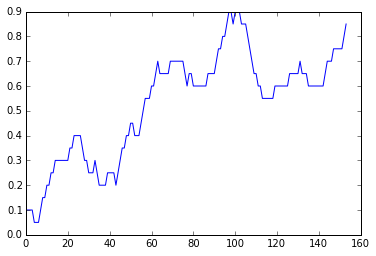

In [1034]:
plt.plot(pd.rolling_mean(results[results['n_labeled_correct']>=0]['n_labeled_correct'],20)[20:])

In [1028]:
#&(results['labeled_score']>0.5)
flag = random.sample(np.nonzero((results['n_labeled_correct']>=0))[0],40)
results['flag'] = 0.0
results.loc[flag,'flag'] = 1.0
sum(results['flag'])

40.0

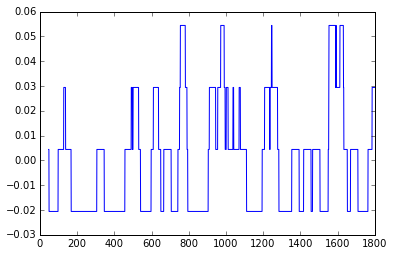

In [568]:
plt.plot(labeled2)

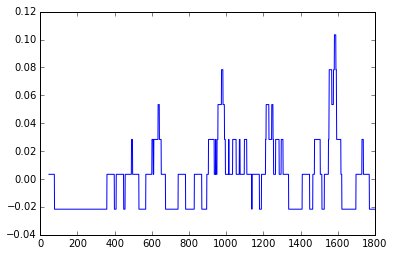

In [563]:
plt.plot(labeled2)

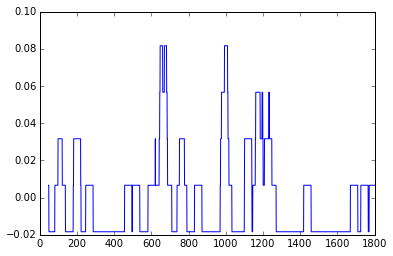

In [559]:
plt.plot(labeled2)

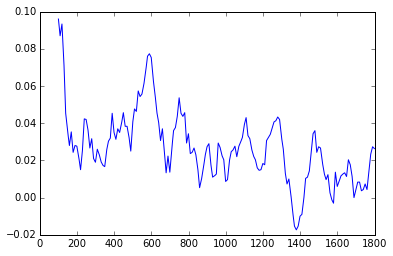

In [574]:
plt.plot(acc_deriv)

In [1029]:
interv = range(200,len(results['accuracy']))
acc = pd.rolling_mean(results['accuracy'],100)[interv]
labeled = pd.rolling_mean(results['flag'],40)[interv]
acc_deriv = acc.diff(periods=100)
#plt.plot()
#plt.plot(+0.5)
#plt.vlines(np.nonzero()[0],0,1,colors='red')

/Users/melkherj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  from IPython.kernel.zmq import kernelapp as app
/Users/melkherj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,center=False).mean()
  app.launch_new_instance()


79 (-0.19358532626522076, 0.00074911764685509823)


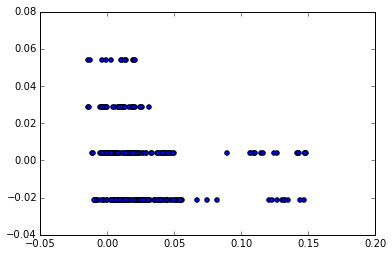

In [1030]:
ixs = random.sample(range(len(acc)-100),300)
labeled2 = (labeled-labeled.mean()).shift(periods=47)
print shift,scipy.stats.pearsonr(acc_deriv[100:].values[ixs],labeled2[100:].values[ixs])
plt.scatter(acc_deriv[100:].values[ixs],labeled2[100:].values[ixs])

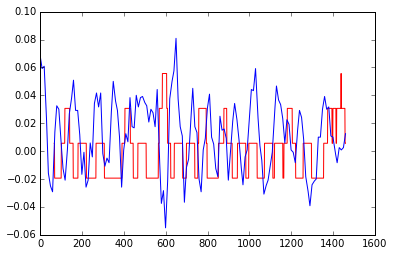

In [529]:
plt.plot(labeled2[40:1500].shift(60),color='red')
#plt.plot(labeled2[40:1000],color='purple')
plt.plot(acc_deriv[40:1500])

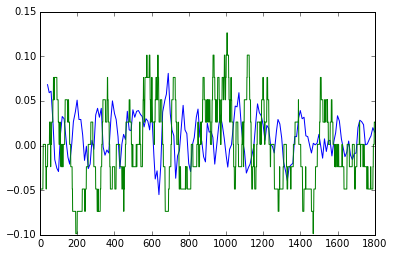

In [270]:
#plt.plot(acc)
plt.plot(acc_deriv)
plt.plot(labeled-labeled.mean())
#plt.plot([0.6]*len(acc))

In [344]:
results

,accuracy,epoch,exp_accuracy,labeled_score,n_labeled,n_labeled_correct,n_next_labeled,n_semisup,scorediff,seconds
0,0.110000,0,0.002200,NaN,0,NaN,0,24882,3.649895e-11,0.666064
1,0.110000,1,0.004356,NaN,0,NaN,0,24882,6.338592e-02,0.275183
2,0.110000,2,0.006469,NaN,0,NaN,0,24827,5.342827e-02,0.246560
3,0.110000,3,0.008540,NaN,0,NaN,0,24782,1.990708e-02,0.246323
4,0.110000,4,0.010569,NaN,0,NaN,0,24767,1.262310e-02,0.249844
5,0.110000,5,0.012557,NaN,0,NaN,0,24776,2.223126e-02,0.242680
6,0.110000,6,0.014506,NaN,0,NaN,0,24792,2.598463e-02,0.241403
7,0.110000,7,0.016416,NaN,0,NaN,0,24793,3.080170e-02,0.247377
8,0.110000,8,0.018288,NaN,0,NaN,0,24805,2.206426e-02,0.241796
9,0.110000,9,0.020122,NaN,0,NaN,0,24816,1.693793e-02,0.244318


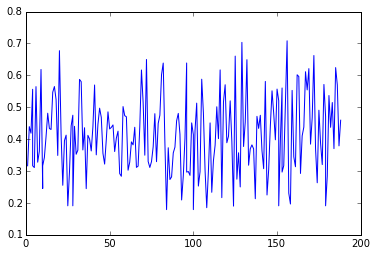

In [190]:
plt.plot(df['n_labeled'],df['labeled_score'])

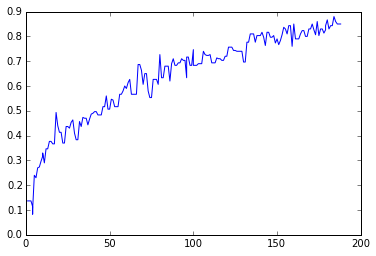

In [182]:
plt.plot(df['n_labeled'],df['accuracy'])

In [587]:
all_results[-3]['githash']

u'50eac5e'

In [ ]:
1. - 1./(((self.n_pos+self.n_neg)+10.)**0.4)

In [633]:
from utils import sigmoid,logodds

In [639]:
sigmoid(logodds(0.7)+3.0)

0.9791084544732513

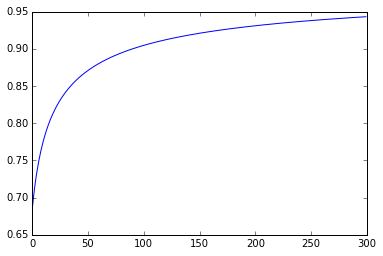

In [632]:
plt.plot(1.-1./(np.arange(300)+10)**0.5)

In [ ]:
from utils import 

In [ ]:
1. - 1./(((self.n_pos+self.n_neg)+10.)**0.4)

In [648]:
import math
def adjust(thresh,n_pos,n_neg,p=0.5,gamma=0.2,lower=0.001,upper=0.999):
    ''' thresh is current score threshold
        ratio is ratio of negatives seen so far to positives '''
    ratio = float(n_pos)/n_neg*(1-p)/p
    thresh = sigmoid(logodds(thresh)-gamma*math.log(ratio))
    return max(min(thresh,upper),lower)

In [652]:
from utils import add_noise

In [863]:
add_noise(0.5)

0.0


0.5

In [ ]:
a = 0.99
np.random.choice(p=[],100)

In [1018]:
def add_noise(thresh,variance=1.0):
    return sigmoid(logodds(thresh)+variance*float(np.random.randn()))

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   4.00000000e+00,   7.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   8.00000000e+00,
          1.20000000e+01,   1.20000000e+01,   1.80000000e+01,
          2.00000000e+01,   2.40000000e+01,   4.60000000e+01,
          6.30000000e+01,   9.80000000e+01,   1.19000000e+02,
          1.72000000e+02,   2.51000000e+02,   4.14000000e+02,
          6.90000000e+02,   1.35800000e+03,   2.70100000e+03,
          3.96700000e+03]),
 array([ 0.69562481,  0.70322885,  0.71083288,  0.71843691,  0.72604094,
         0.73364497,  0.741249  ,  0.74885304,  0.75645707,  0.7640611 ,
         0.77166513,

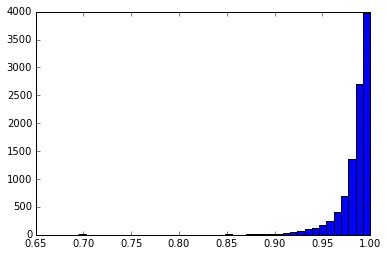

In [1019]:
plt.hist([add_noise(0.99) for _ in range(10000)],bins=40)

In [715]:
from utils import add_noise

Assumptions:
- p-accuracy changes over time
- 

Goal for semi-supervised:
- optimally "spend" semisupervised in T trials.  Let's say 100?
- 

In [790]:
add_noise(0.7,1.0)

0.6730510822953778

In [ ]:
ps = 1. - 1./((k+10.)**0.4)
plt.plot()
plt.plot()

In [792]:
sigmoid(logodds(0.5)+1.0)

0.7310585786300049

Optimizing projected quality of labels:
- 

In [825]:
add_noise(0.5,0.4)

0.47332272112821766

In [ ]:
compare this simple method to random?

"active learning is hard"
- we don't know what prior is?

In [ ]:
p_active = 1. - 1./((k+10.)**0.5)
p_semisup = sigmoid(logodds(p_active)+0.5)

Ranking selection for active semi-supervised learning

Assume a prior T= #labels
our goal is optimize perf in this paradigm



Theorem:
- Assuming 

Justification for simply quantile-ranking?
- 

In [1020]:
1/100.*math.log(15)

0.027080502011022103

In [21]:
import tensorflow as tf

In [23]:
from utils import *
sigmoid(logodds(0.5)+2.0)

0.8807970779778823

In [1021]:
1.5*math.exp(-0.027*100)

0.10080826910962463

In [24]:
utils.logodds(0.9)

2.1972245773362196

In [28]:
f0 = 0.1
fb = 0.9
b = 100.
l0 = math.log(1./(1-f0))
lb = math.log(1./(1-fb))
alpha = (lb-l0)/b
beta = l0/alpha

In [27]:
alpha,beta

(0.021972245773362195, 4.795163714469232)

In [20]:
import math
1.5*math.exp(-0.05*100)

0.0101069204986282

In [29]:
logodds(0.9)

2.1972245773362196

In [25]:
k = np.arange(500)
ps_active = 0.99-np.exp(-alpha*(k+5+beta))
ps_semi = 0.99-np.exp(-alpha*(k+50+beta)) # 1. - 1./((k+10.)**0.5)
#ps_semi = [sigmoid(logodds(x)+0.5) for x in ps_active]
plt.plot(ps_active)
plt.plot(ps_semi)

NameError: name 'alpha' is not defined

In [644]:
results[results['n_next_labeled']>0]['labeled_score']

5       0.425806
28      0.916396
33      0.991628
48      0.999230
51      0.999334
61      0.998572
63      0.998993
69      0.999287
71      0.999103
73      0.998932
88      0.998491
130     0.998824
133     0.998514
137     0.999336
141     0.999393
142     0.998165
163     0.998938
168     0.999099
173     0.999395
178     0.999068
183     0.999007
188     0.998853
196     0.999019
198     0.998720
218     0.998806
231     0.999215
232     0.998818
239     0.998938
245     0.999252
255     0.998652
          ...   
1651    0.956350
1659    0.964086
1693    0.848622
1716    0.679739
1719    0.642521
1721    0.525230
1724    0.449891
1731    0.632347
1738    0.398423
1739    0.380264
1746    0.309181
1751    0.312936
1752    0.516382
1764    0.175825
1805    0.175825
1840    0.175825
1852    0.175825
1859    0.175825
1866    0.175825
1874    0.175825
1901    0.175825
1934    0.175825
1946    0.175825
1950    0.175825
1959    0.175825
1963    0.175825
1967    0.175825
1974    0.1758

In [46]:
from sklearn.linear_model import LinearRegression

In [115]:
results['n_labeled'].values.shape

(1000,)

In [118]:
x = results['n_labeled'].values
y = results['accuracy'].values

In [124]:
import pandas as pd


/Users/melkherj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  from IPython.kernel.zmq import kernelapp as app


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9      0.040
10     0.047
11     0.054
12     0.061
13     0.068
14     0.075
15     0.082
16     0.089
17     0.096
18     0.103
19     0.110
20     0.124
21     0.138
22     0.152
23     0.166
24     0.180
25     0.194
26     0.208
27     0.222
28     0.236
29     0.250
       ...  
970    0.627
971    0.624
972    0.621
973    0.618
974    0.615
975    0.612
976    0.609
977    0.606
978    0.603
979    0.600
980    0.597
981    0.594
982    0.591
983    0.588
984    0.585
985    0.582
986    0.579
987    0.576
988    0.573
989    0.570
990    0.571
991    0.572
992    0.573
993    0.574
994    0.575
995    0.576
996    0.577
997    0.578
998    0.579
999    0.580
Name: accuracy, dtype: float64

In [119]:
LinearRegression().fit(x,y) #.predict(results['n_labeled'].values)

ValueError: Found arrays with inconsistent numbers of samples: [   1 1000]

,0,1
0,active_thresh,0.757331
1,active_variance,0.3815
2,name,max
3,semisup_thresh,0.902594
